## Importing necessary libraries

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis

import numpy as np  # library used for working with arrays

import matplotlib.pyplot as plt  # library for visualization

import seaborn as sns  # library for visualization

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

# Binomial Distribution

### Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.  Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.

In [2]:
# size of sample
n = 10

# probability of success (led fail)
p = 0.05

# all possible outcomes
k=np.array([0,1,2,3,4,5,6,7,8,9,10])

**a) What is the probability that none of the LED bulbs are defective?**

In [3]:
from scipy.stats import binom

binomial = binom.pmf(k=0, n=n, p=p)
binomial

0.5987369392383789

**b) What is the probability that exactly one LED bulb is defective?**

In [4]:
binomial = binom.pmf(k=1, n=n, p=p)
binomial

0.31512470486230504

**c) What is the probability that two or fewer LED bulbs are defective?**

Hint: We need to calculate cumulative probability of two or fewer LED bulbs being defective.

In [5]:
binomial = binom.cdf(k=2, n=n, p=p)
binomial

0.9884964426207031

**d) What is the probability that three or more LED bulbs are defective?**

Hint: We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [6]:
binomial = 1 - binom.cdf(k=2, n=n, p=p)
binomial

0.01150355737929687

### Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of free-throw shots is 93%. Find the following probabilities.

In [9]:
# probability of making a free throw
p = 0.93

**a) What is the probability that the player will convert both the shots?**

In [11]:
binomial = binom.pmf(k=2, n=2, p=p)
binomial

0.8649000000000001

**b) What is the probability that the player will convert at least one shot?**

In [13]:
binomial = 1 - binom.cdf(k=0, n=2, p=p)
binomial

0.9951

### Q3.	Over a long period in a large multinomial corporation, 10% of all sales trainees rated as outstanding, 75% rated as excellent, 10% rated as satisfactory, and 5% are considered unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.

In [14]:
n = 10

outstanding = 0.1
excellent = 0.75
satisfactory = 0.1
unsatisfactory = 0.5

**a) Two are rated as outstanding**

In [15]:
binomial = binom.pmf(2,10,0.1)
binomial

0.19371024450000005

**b) Two or more are rated as outstanding**

In [17]:
1 - binom.cdf(1,10,0.1)

0.2639010708999998

**c) Eight of the ten are rated either outstanding or excellent**

In [18]:
binom.pmf(8,10,0.85)

0.27589665660205087

**d) None of the trainees are rated as unsatisfactory**

In [20]:
binom.pmf(0,10,0.05)

0.5987369392383789

# Uniform Distribution

### Q4. A University records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.

In [21]:
df = pd.read_csv('assignment.csv')
df.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


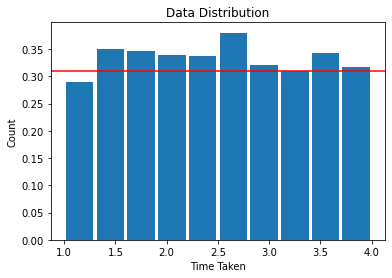

In [27]:
plt.hist(df['Time_taken'], rwidth=0.9, density=True)
plt.axhline(0.31, color='red')
plt.title('Data Distribution')
plt.xlabel('Time Taken')
plt.ylabel('Count')
plt.show()

In [31]:
from scipy.stats import uniform
x = np.linspace(1,4,50)
probs = uniform.pdf(x, loc=1, scale=3)
probs

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF:** of a random variable (X) is the probability that X will take the value less than or equal to x. It can be represented mathematically as below:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

In [32]:
uniform.cdf(x=2.5, loc=1, scale=3)

0.5

**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X>=3)$

In [34]:
round(1 - uniform.cdf(x=3, loc=1, scale=3),4)

0.3333

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5<= X <=3.5)$

In [36]:
round(uniform.cdf(x=3.5, loc=1, scale=3) - uniform.cdf(x=1.5, loc=1, scale=3),4)

0.6667

# Normal Distribution

### Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.

In [39]:
from scipy.stats import norm
mu = 850
sigma = 150

**a) What is the probability that a randomly selected cell phone bill is more than Rs 1200?**

In [42]:
prob_more_than_1200 = 1 - norm.cdf(1200, mu ,sigma)
round(prob_more_than_1200,4)

0.0098

**b) What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?**

In [43]:
prob_bet_750_1200 = norm.cdf(1200, mu, sigma) - norm.cdf(750, mu, sigma)
round(prob_bet_750_1200,4)

0.7377

**c) What is the probability that a randomly selected cell phone bill is no more than Rs 650?**

In [45]:
prob_less_than_650 = norm.cdf(650, mu, sigma)
round(prob_less_than_650,4)

0.0912

**d) What is the amount above which lies the top 15% of cell phone bills?**

In [47]:
prob_top_15 = 1 - norm.ppf(0.85, mu, sigma)
round(prob_top_15, 4)

1005.465

**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [48]:
prob_bottom_25 = norm.ppf(0.25, mu, sigma)
round(prob_bottom_25, 4)

748.8265

### Q6. The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.

In [49]:
mu = 500
sigma = 20

**a) What is the probability that the bottle filled less than 480 ml?**

In [50]:
prob_less_480 = norm.cdf(480, mu, sigma)
round(prob_less_480, 4)

0.1587

In [52]:
x1 = 480
z1 = (x1-mu)/sigma
round(norm.cdf(z1),4)

0.1587

**b) What is the probability that the bottle filled more than 520 ml?**

In [54]:
prob_more_520 = 1 - norm.cdf(520, mu, sigma)
round(prob_more_520,4)

0.1587

**c) What is the probability that the bottle filled between 470 ml to 525 ml?**

In [55]:
prob_bet_470_525 = norm.cdf(525, mu, sigma) - norm.cdf(470, mu, sigma)
round(prob_bet_470_525, 4)

0.8275

In [56]:
x3=470
z3=(x3-mu)/sigma
x4=525
z4=(x4-mu)/sigma
p2=stats.norm.cdf(z3)
p3=stats.norm.cdf(z4)
p4=p3-p2
p4

0.8275430250642866

### Q7. In 2 Liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.

In [57]:
mu = 2
sigma = 0.05

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [58]:
prob_bet_19_2 = norm.cdf(2, mu, sigma) - norm.cdf(1.9, mu, sigma)
round(prob_bet_19_2, 4)

0.4772

**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [60]:
prob_bet_19_21 = norm.cdf(2.1, mu, sigma) - norm.cdf(1.9, mu, sigma)
round(prob_bet_19_21, 4)

0.9545

**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [61]:
prob_bellow_19 = norm.cdf(1.9, mu, sigma)
prob_above_21 = 1 - norm.cdf(2.1, mu, sigma)
prob_bellow_19_above_21 = prob_bellow_19 + prob_above_21
round(prob_bellow_19_above_21, 4)

0.0455

**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [64]:
round(norm.ppf(0.01, mu, sigma),2)

1.88

# Sampling Distribution

### Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.

In [65]:
mu = 60
sigma = 6
n = 40

In [67]:
# sample std
s = sigma/np.sqrt(n)
prob_less_58 = norm.cdf(58, mu, s)
round(prob_less_58, 4)

0.0175

# Interval Estimation

### Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2020. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.

### Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating a 95% confidence interval for the mean usage in the first quarter of 2019. 

In [68]:
mu = 310
sigma = 89
n = 40
s = sigma/np.sqrt(n)

In [70]:
np.round(norm.interval(0.95, mu, s),2)

array([282.42, 337.58])

**Insight:** 
 
 95% of the time, the mean usage in the first quarter of 2019 will be between 282.42 and 337.58 kWh.